In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [5]:
#load dataset
df= pd.read_csv('NEMFUELMIX_ALL.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DateTime   1523 non-null   object 
 1   State      1523 non-null   object 
 2   Fuel Type  1523 non-null   object 
 3   Supply     1523 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.7+ KB


In [7]:
#display columns
df.columns

Index(['DateTime', 'State', 'Fuel Type', 'Supply'], dtype='object')

In [8]:
#calculate sum of null values
df.isnull().sum()

DateTime     0
State        0
Fuel Type    0
Supply       0
dtype: int64

In [9]:
#display all columns
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,DateTime,State,Fuel Type,Supply
0,29/10/2022 0:00,NSW,Battery,362.534
1,29/10/2022 0:00,NSW,Black coal,627223.514
2,29/10/2022 0:00,NSW,Gas,13468.075
3,29/10/2022 0:00,NSW,Hydro,104066.278
4,29/10/2022 0:00,NSW,Liquid Fuel,67.375


In [11]:
#display null values
df[df.isnull().any(axis=1)]

,DateTime,State,Fuel Type,Supply


In [12]:
#number of duplicate entries
print('Duplicate entries found in this dataset = {}.' .format(df.duplicated().sum()))

Duplicate entries found in this dataset = 0.


In [13]:
# Number of rows and columns in the dataframe
df.shape

(1523, 4)

In [15]:
#describe data
df[['Supply']].describe()

,Supply
count,1.523000e+03
mean,1.187704e+05
std,2.173309e+05
min,0.000000e+00
25%,1.838195e+03
50%,3.272898e+04
75%,1.078783e+05
max,1.041763e+06


Text(0, 0.5, 'Supply')

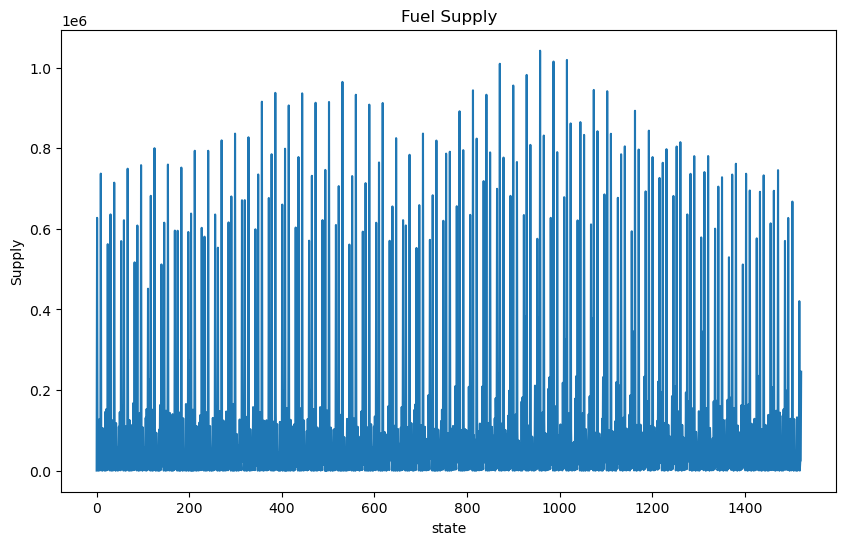

In [31]:
#visualize fuel supply
plt.figure(figsize=(10,6))
sns.lineplot(df['Supply'])
plt.title('Fuel Supply')
plt.xlabel('state')
plt.ylabel('Supply')

In [22]:
X = df[['Supply']]
Y =  df[['DateTime','Fuel Type', 'Supply']]

In [23]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans_model.fit_predict(X)

C:\Users\wambu\anaconda3\envs\PythonData\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


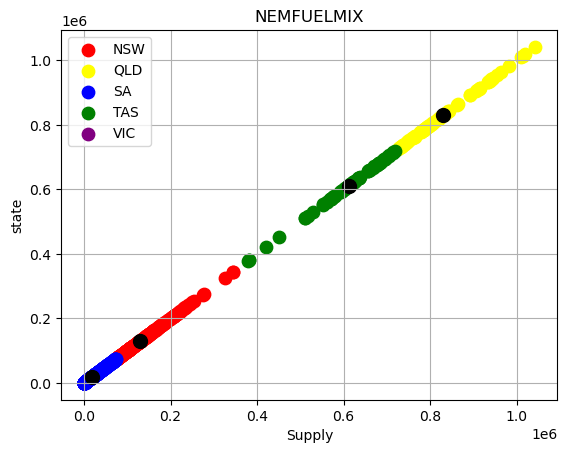

In [30]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0, 0], m[y_kmeans == 0, 0], s=80, c='red', label='NSW')
plt.scatter(m[y_kmeans == 1, 0], m[y_kmeans == 1, 0], s=80, c='yellow', label='QLD')
plt.scatter(m[y_kmeans == 2, 0], m[y_kmeans == 2, 0], s=80, c='blue', label='SA')
plt.scatter(m[y_kmeans == 3, 0], m[y_kmeans == 3, 0], s=80, c='green', label='TAS')
plt.scatter(m[y_kmeans == 4, 0], m[y_kmeans == 4, 0], s=80, c='purple', label='VIC')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 0], s=100, c='black')
plt.title('NEMFUELMIX')
plt.xlabel('Supply')
plt.ylabel('state')
plt.legend()
plt.grid(True)
plt.show()

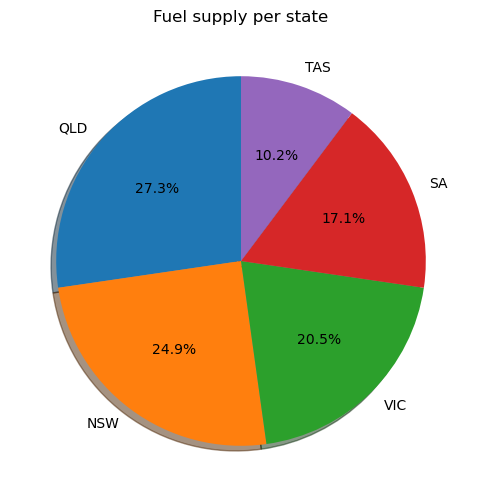

In [32]:
#pie chart 
plt.figure(figsize=(10,6))
df['State'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Fuel supply per state')
plt.ylabel('')
plt.show()